### implenmenting bag of words

In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.DataFrame({
    'text':['people watch campusx','campusx watch campusx', 'people write comment', 'campusx write comment'],
    'output':[1,1,0,0]
    })

In [28]:
df

text  output
0   people watch campusx       1
1  campusx watch campusx       1
2   people write comment       0
3  campusx write comment       0

In [29]:
#implementing bag of words using sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer()

In [31]:
bow = cv.fit_transform(df["text"])

In [32]:
#getting the vocabullary
print(f"The vocabulary for the dataset is : \n : {cv.vocabulary_}")

The vocabulary for the dataset is : 
 : {'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [38]:
bow 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (4, 6)>

In [39]:
print(f"Text : ")
print(df["text"][0])
print(bow[0].toarray())
print(df["text"][1])
print(f"Text : ")
print(bow[1].toarray())

Text : 
people watch campusx
[[0 0 1 0 1 0]]
campusx watch campusx
Text : 
[[1 0 0 0 1 0]]


In [40]:
df["text"][0]

'people watch campusx'

### n gram implemnetation

Advantage:
the meaning of both the sentance is totaly different, which is also captured when we use ngram

Unigram approahc -> we cannot capture semantic meaning
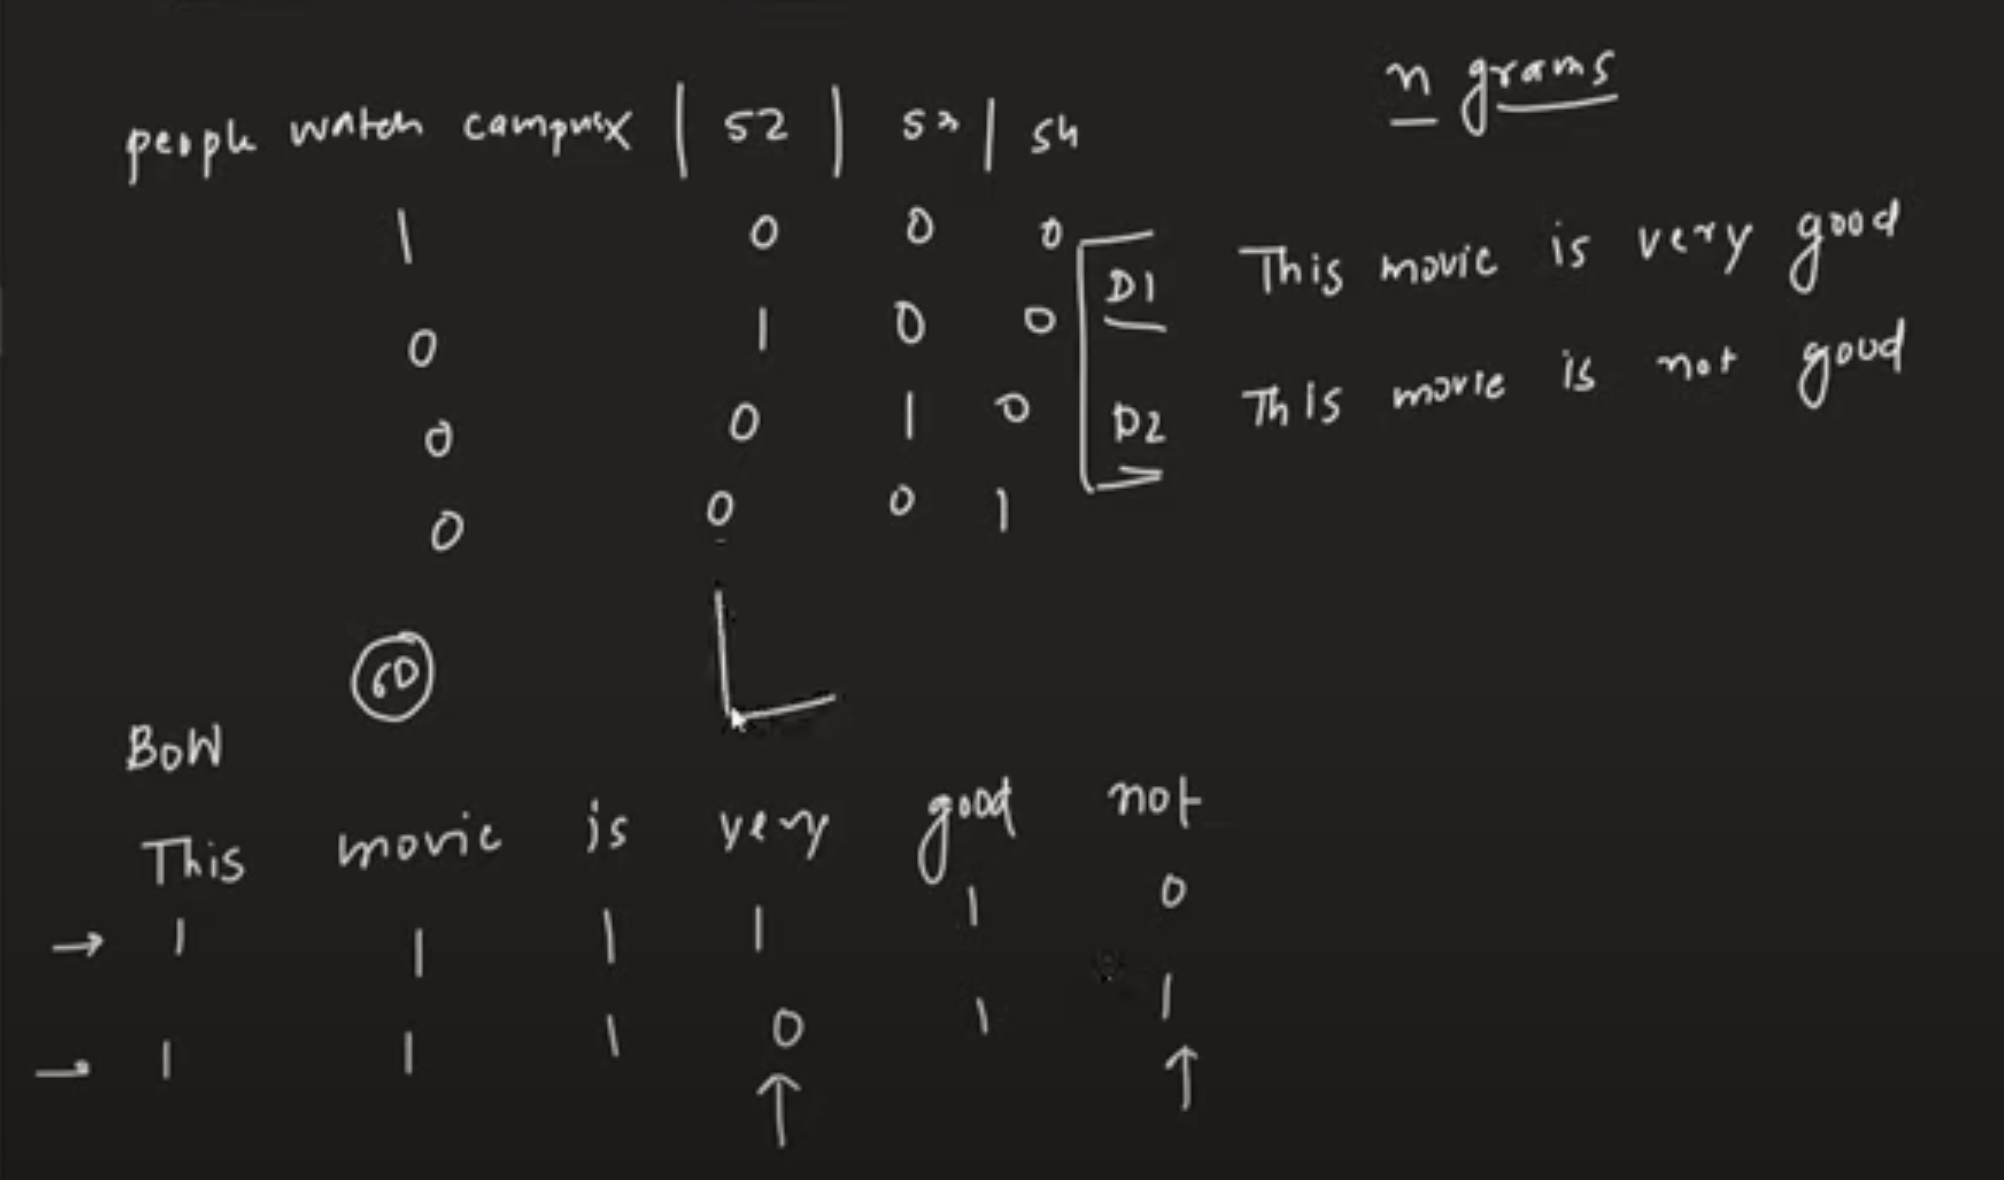

Bigram approach-> we have better semantic meaning
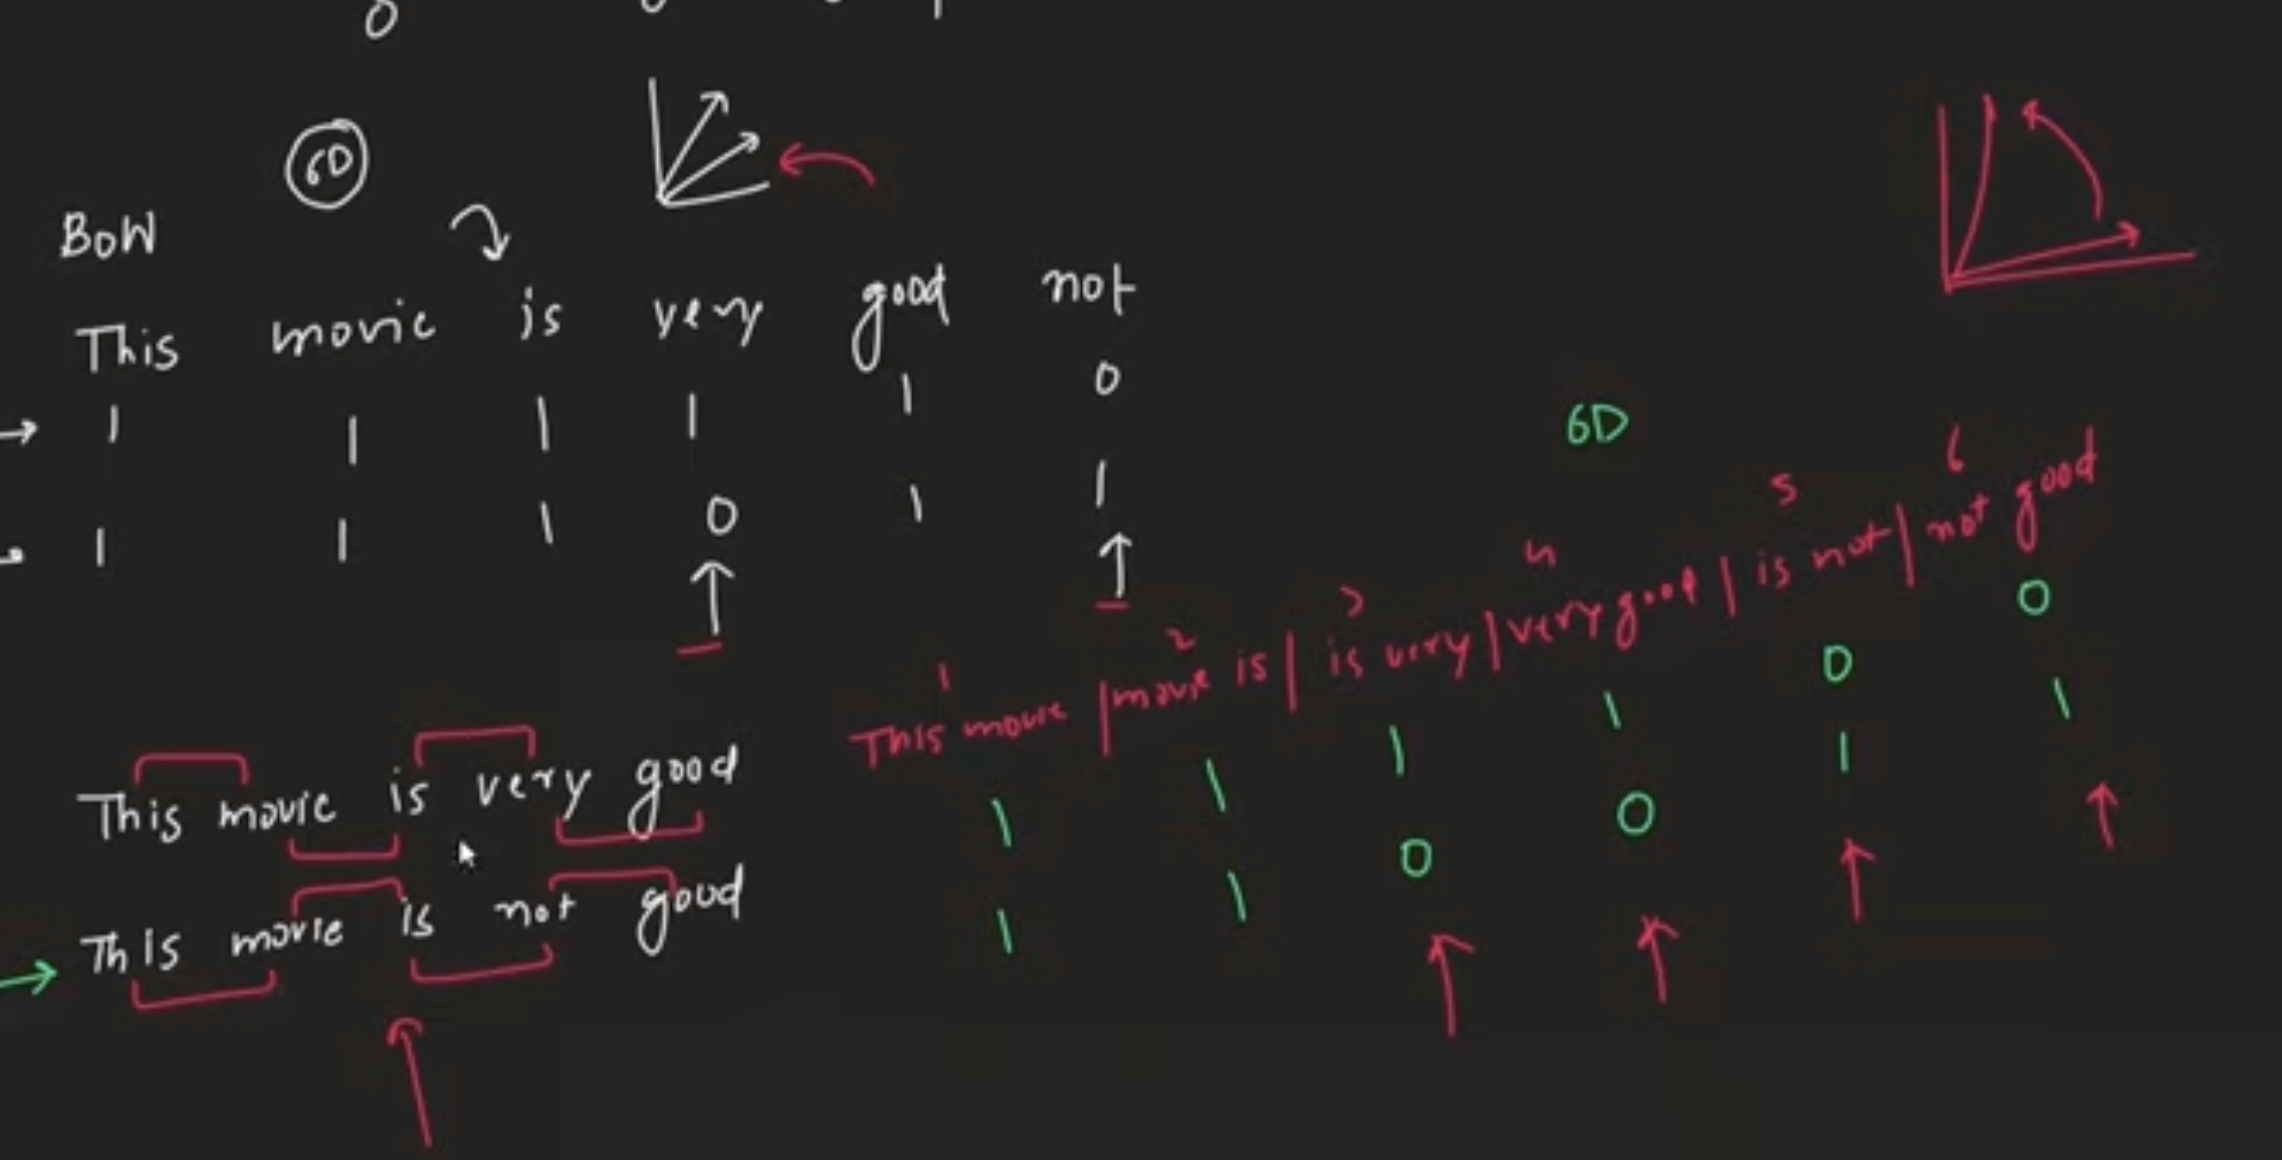

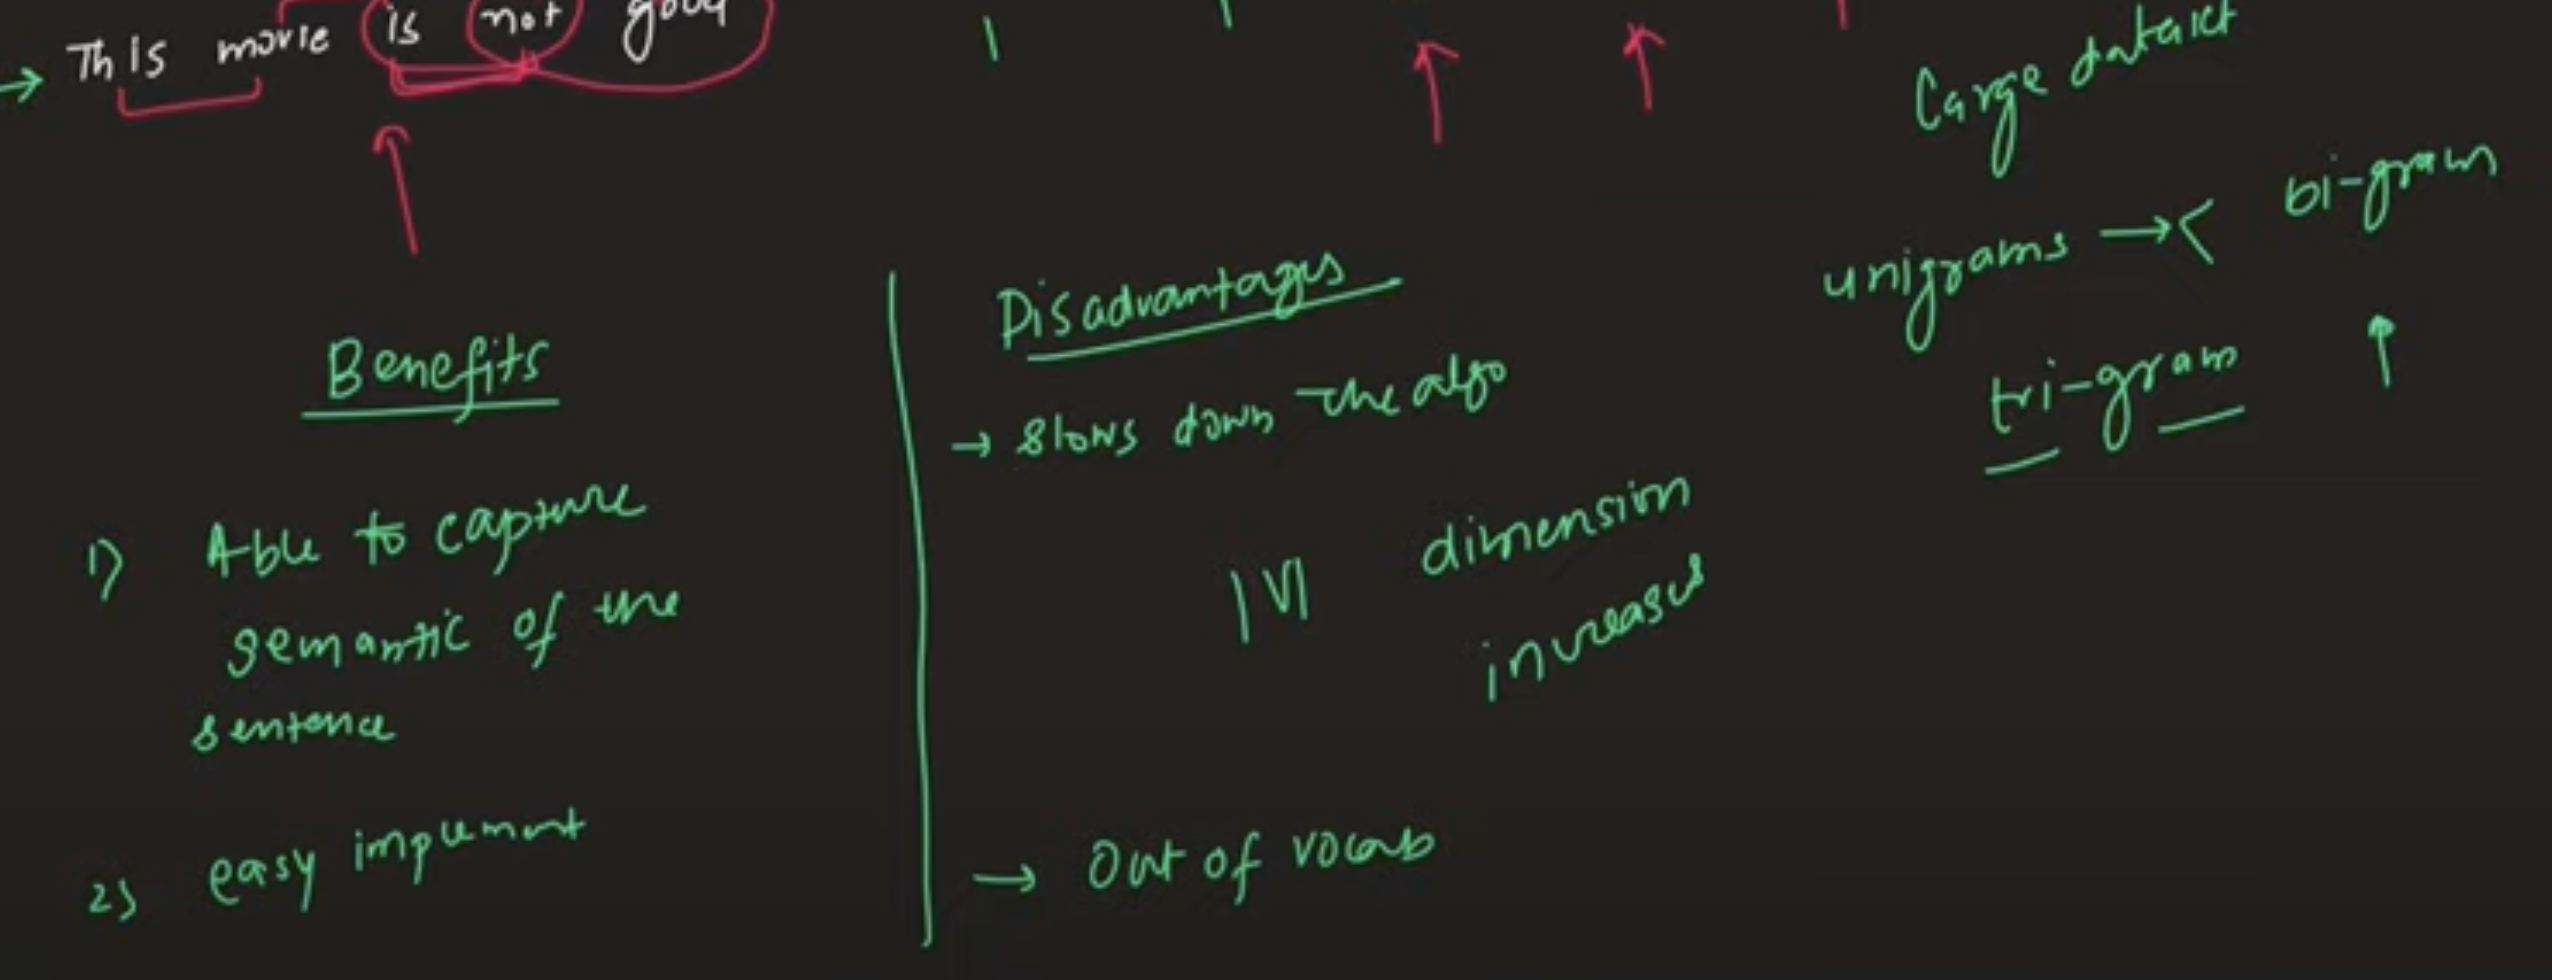


In [41]:
cv = CountVectorizer(ngram_range=(2,2))


In [42]:
bow = cv.fit_transform(df["text"])

In [43]:
#getting the vocabullary
print(f"The vocabulary for the dataset is : \n : {cv.vocabulary_}")

The vocabulary for the dataset is : 
 : {'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [44]:
print(f"Text : ")
print(df["text"][0])
print(bow[0].toarray())
print(df["text"][1])
print(f"Text : ")
print(bow[1].toarray())

Text : 
people watch campusx
[[0 0 1 0 1 0]]
campusx watch campusx
Text : 
[[1 0 0 0 1 0]]


### tf idf

in above case equal weightage is to each word, which is incorrect in a way, we need to convey proper weigtage of word, we can use tf idf for this

if word is occuring a lot in a document but not occuring that frequently in the enitre corpus -> then the word is importatn for that paticular document-> we give more score to that document in that paticular entry

tf - term frequcy
idf -  inverse documnet frequcy

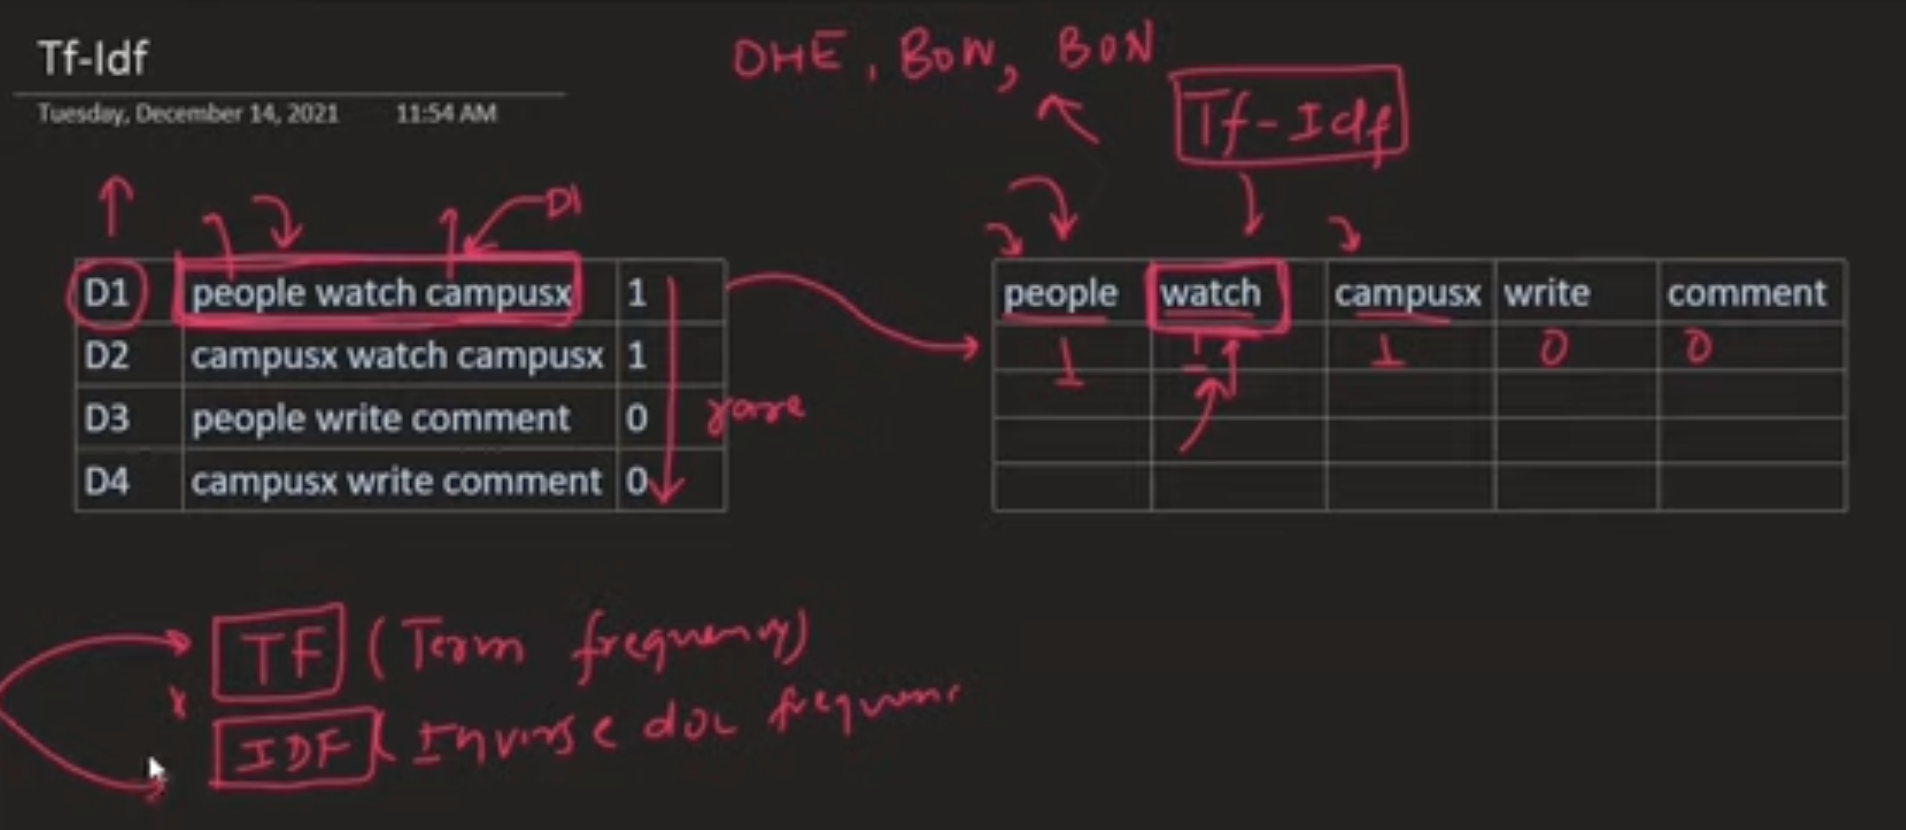

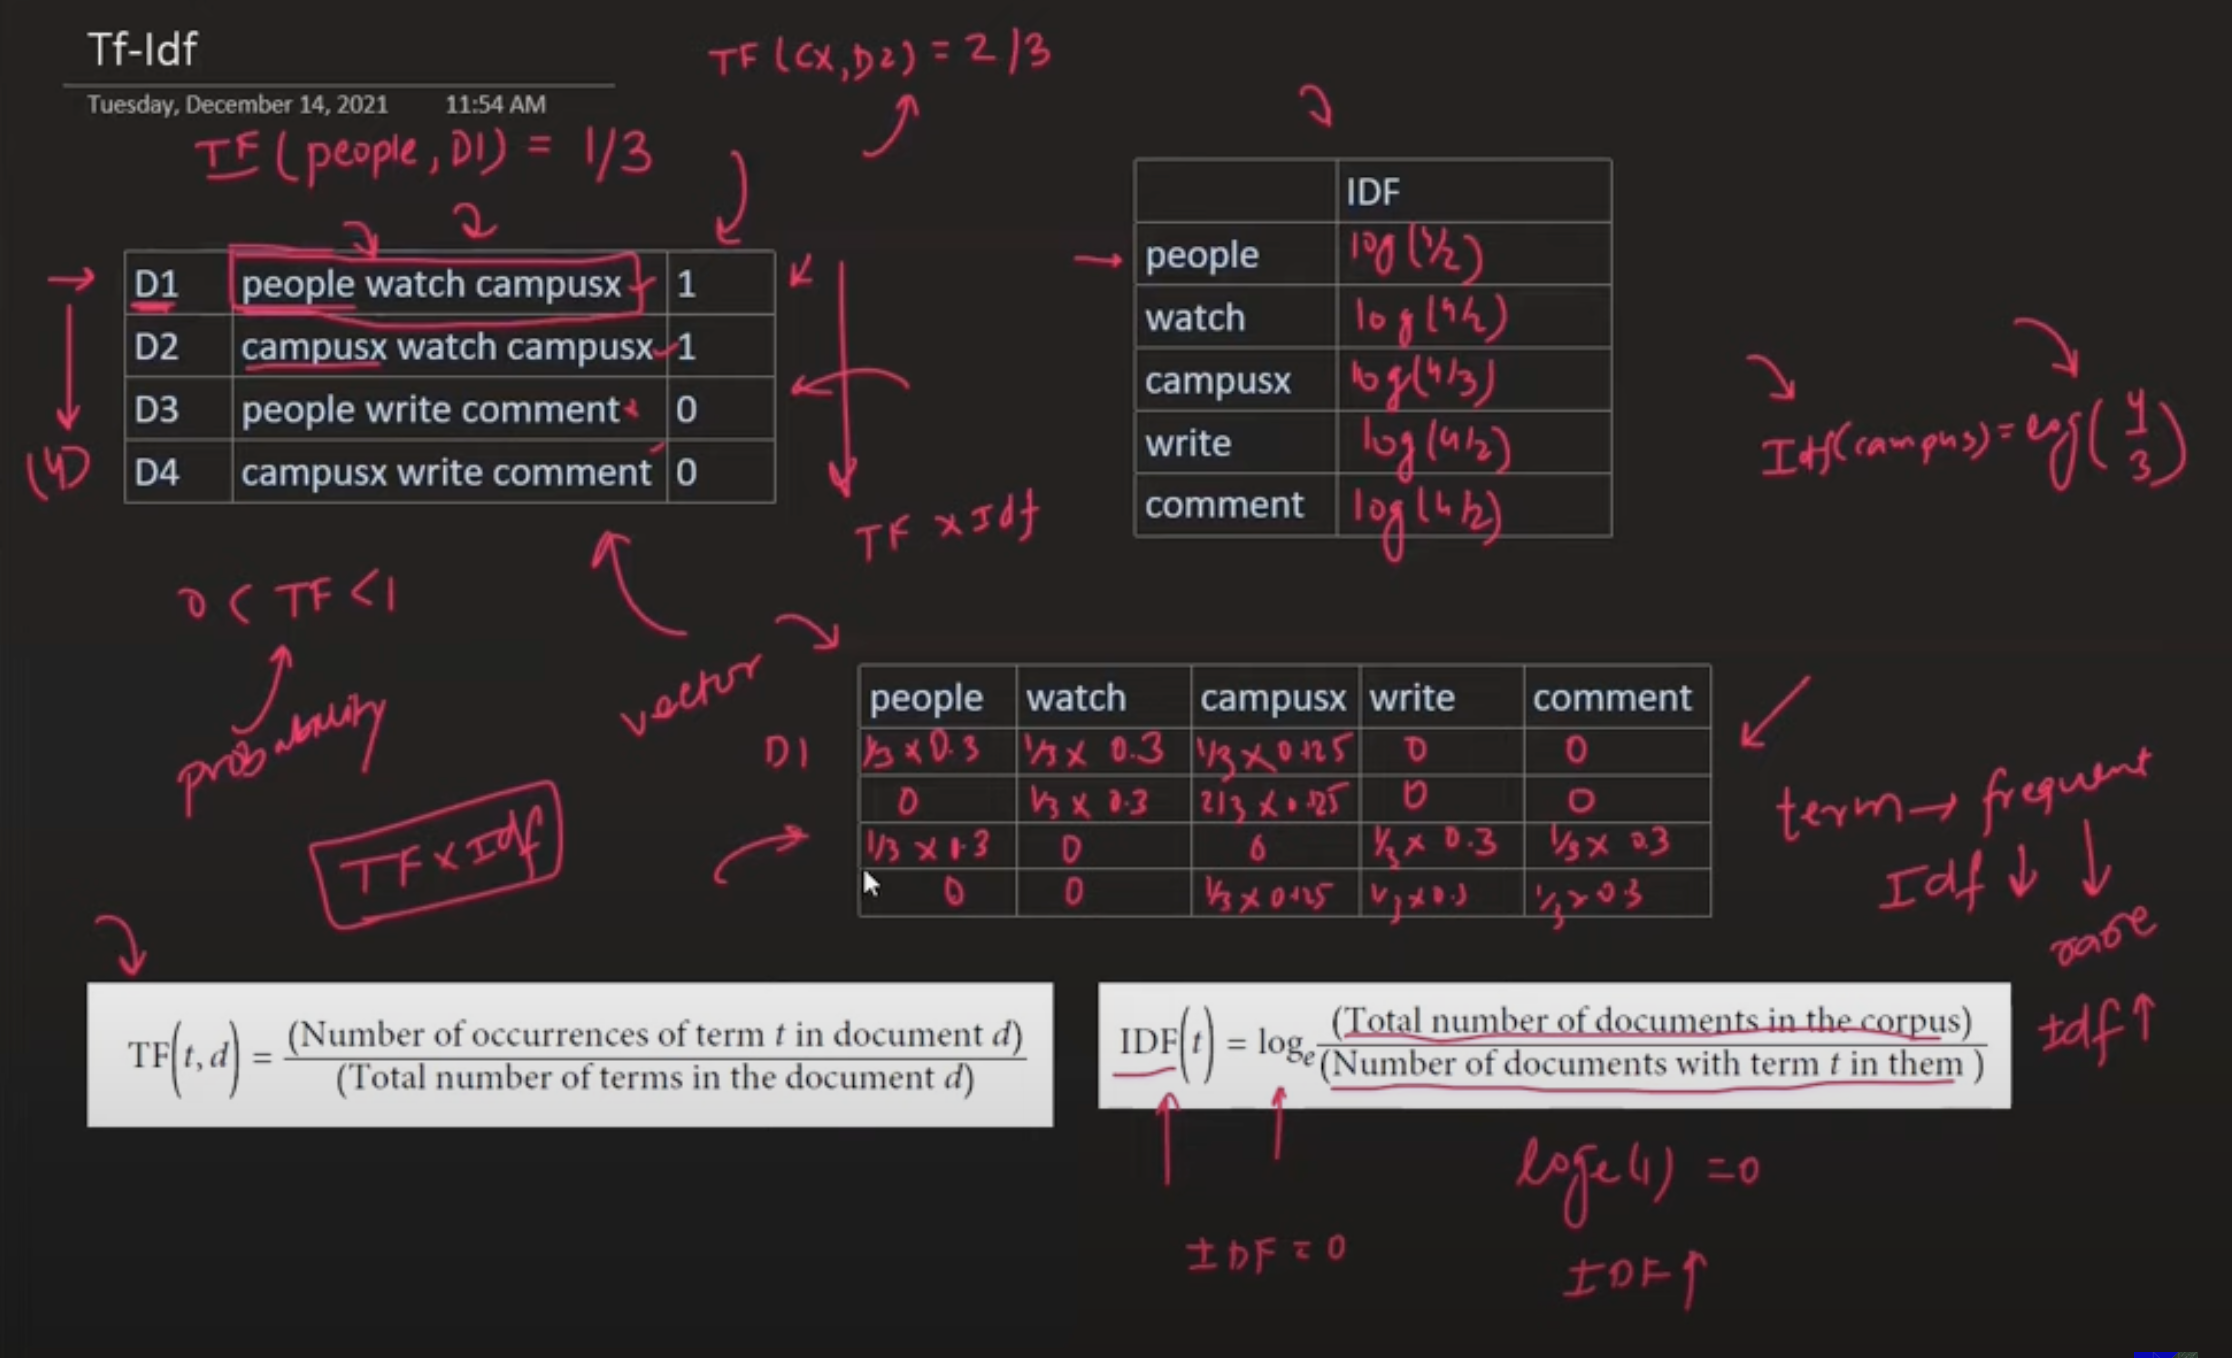

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

#performing tfidf on the corpus
tfidf.fit_transform(df["text"]).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [48]:
#getting the idf value for the corpus
print(f"the tfidf value for the courpus is : \n {tfidf.idf_}")

#getting the featuer name for the dataset
print(f"The feature name for the dataset is : \n {tfidf.get_feature_names_out()}")

the tfidf value for the courpus is : 
 [1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
The feature name for the dataset is : 
 ['campusx' 'comment' 'people' 'watch' 'write']


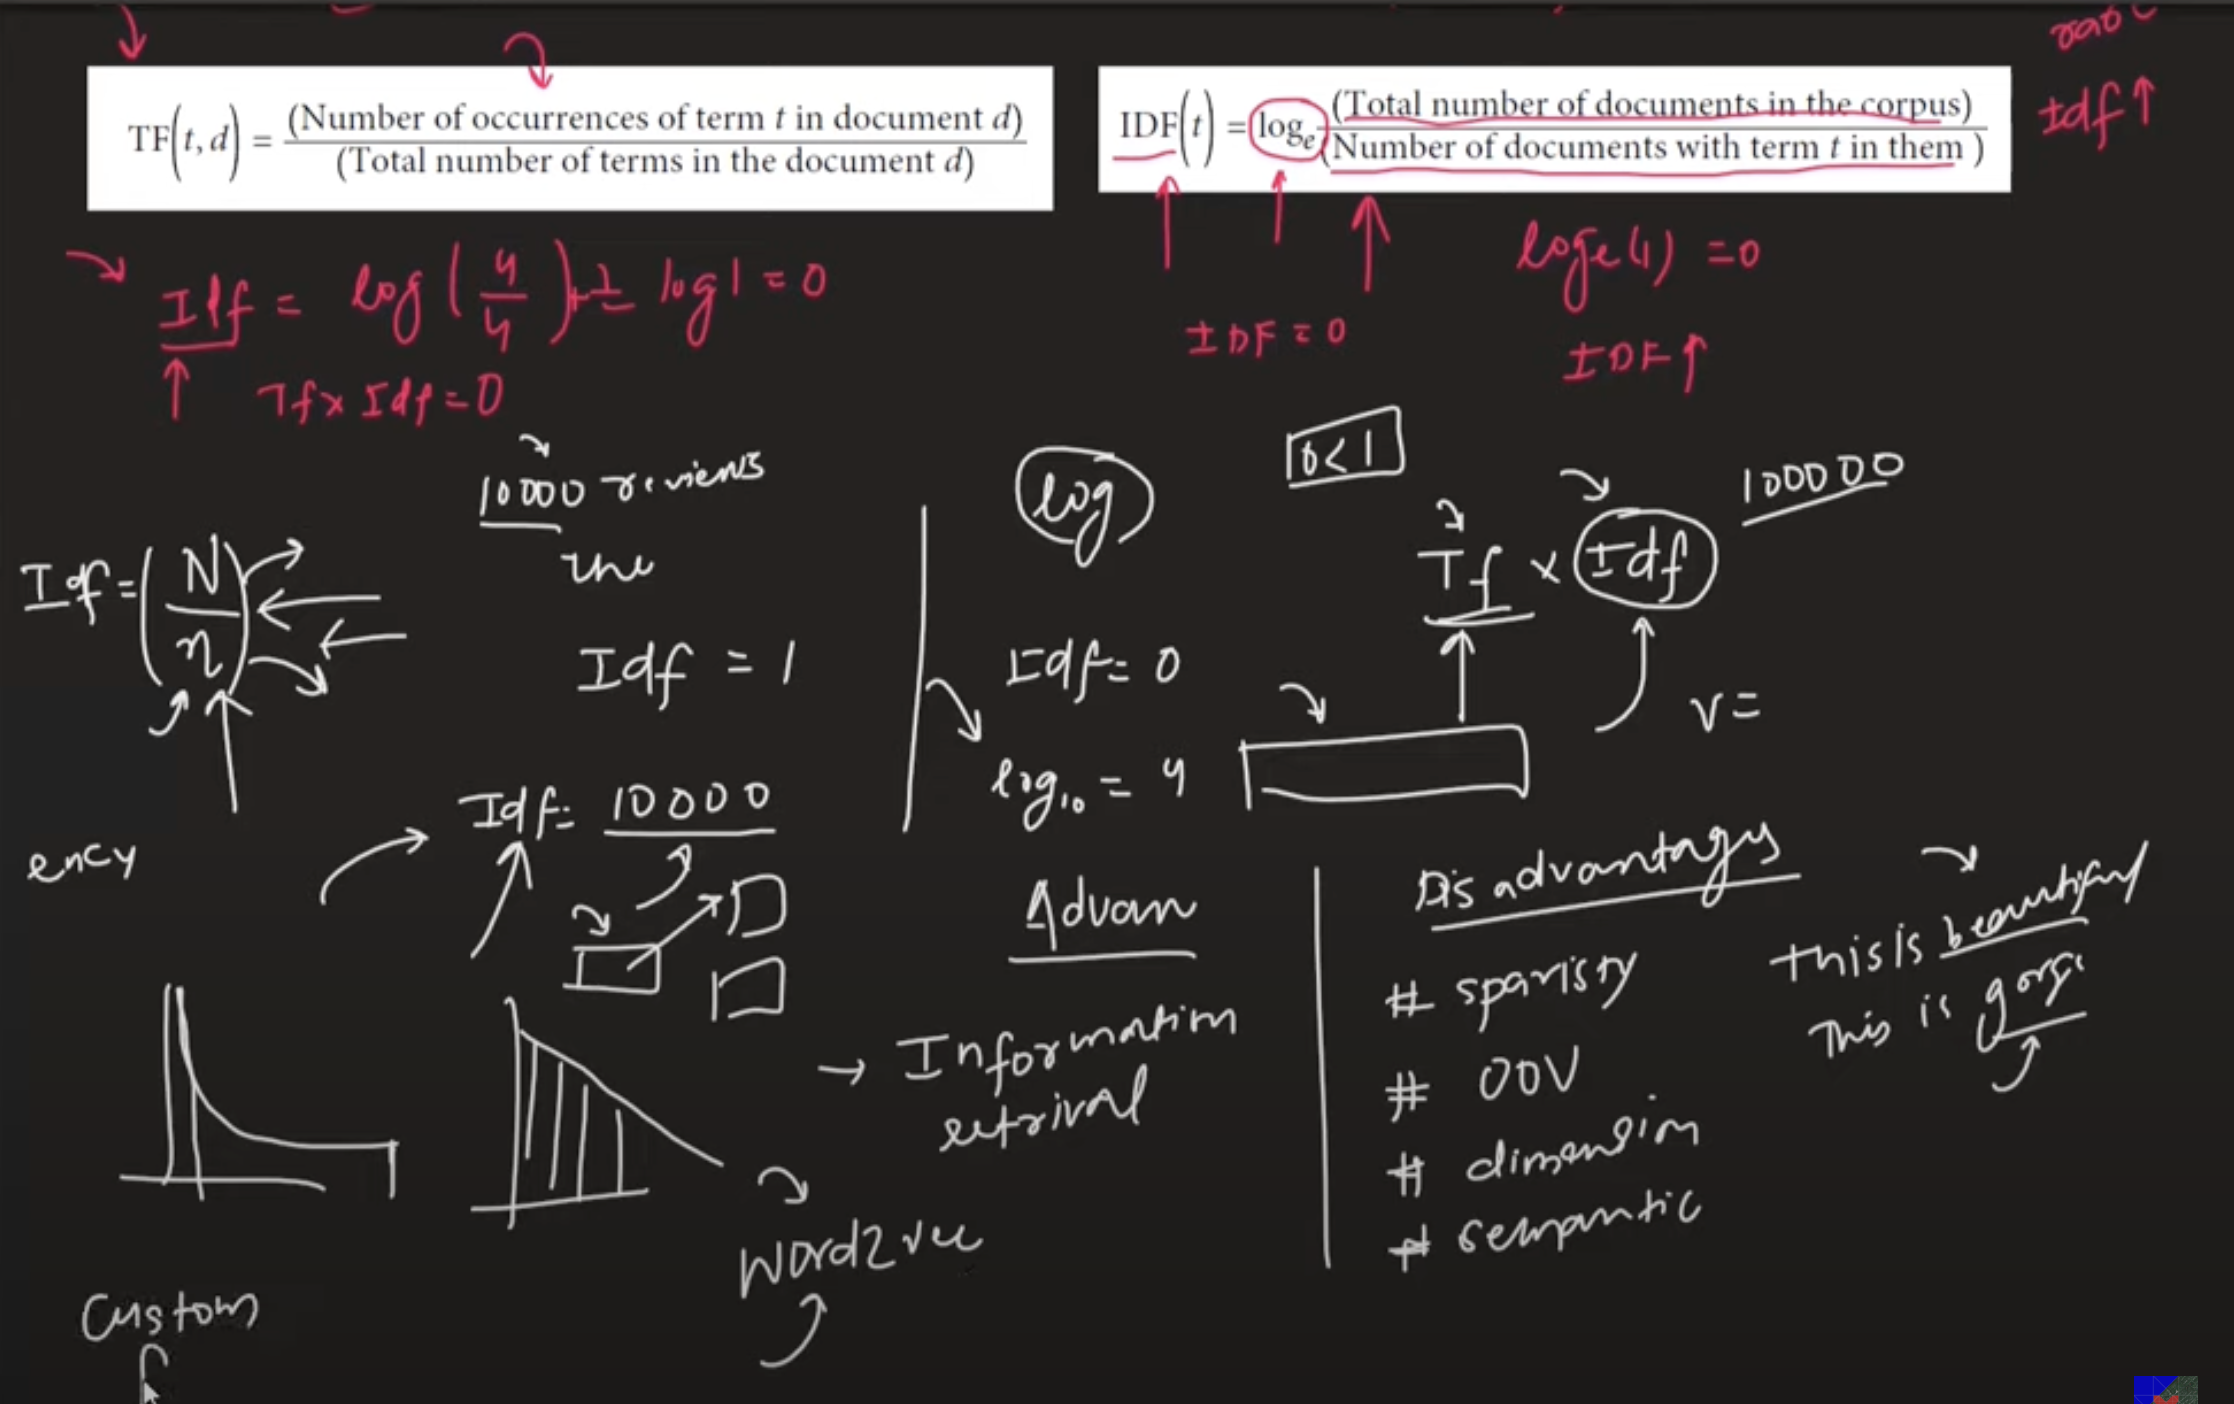